# Test the mesh dependency for the highest Reynolds number

The case *water_05* corresponds to a $d_b=1.8~mm$ air bubble rising in water and yields the highest Reynolds number among the investigated bubbles. The flow field was repeatedly computed in OpenFOAM on four meshes with different refinement levels (refinement_...). In a region around the bubble patch, the background hexmesh was slpit 1-4 times (snappyHexMesh) such that the average edge width decreses by a factor of approximately 0.5 (in $x$ and $y$ direction) between refinement levels.

Only the coarsest and finest levels are displayed here.

## Dependencies

Notebooks (links work only if the Docker container is running)

- [process_logs.ipynb](http://127.0.0.1:8888/notebooks/process_logs.ipynb)

Raw data

- ../data/water_05_l16/water_05_l16_t14.csv
- ../data/water_05_l16/water_05_l16_of_flow_ref0.csv
- ../data/water_05_l16/water_05_l16_of_flow_ref3.csv

To see how the data was extracted from Basilisk simulations, refer to the notebook [basilisk_2D_velocity_field.ipynb](http://127.0.0.1:8888/notebooks/basilisk_2D_velocity_field.ipynb). The setups for the OpenFOAM simulations are available [here](https://github.com/AndreWeiner/phd_openfoam/tree/master/test_cases/simpleFoam).

## Visualization

In [5]:
import helper_module as hm

ref_0_path = "../data/water_05_l16/water_05_l16_of_flow_ref0.csv"
ref_0 = hm.CenterFieldValues2D(ref_0_path, [0.0, 0.0], [0.0, 0.0], of=True)
ref_3_path = "../data/water_05_l16/water_05_l16_of_flow_ref3.csv"
ref_3 = hm.CenterFieldValues2D(ref_3_path, [0.0, 0.0], [0.0, 0.0], of=True)

log_path = "../data/water_05_l16/log.water_05_l16.csv"
log = hm.Logfile(log_path)
log.read_logfile(usecols=['time', 'u_x', 'x'])
row = log.find_closest("time", 14)
basilisk_path = "../data/water_05_l16/water_05_l16_t14.csv"
basilisk = hm.CenterFieldValues2D(basilisk_path, [0.0, row.x.values[0]], [0.0, row.u_x.values[0]])

Successfully read file ../data/water_05_l16/water_05_l16_of_flow_ref0.csv
Successfully read file ../data/water_05_l16/water_05_l16_of_flow_ref3.csv
Successfully read file ../data/water_05_l16/log.water_05_l16.csv
Successfully read file ../data/water_05_l16/water_05_l16_t14.csv


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
rc('text', usetex=True)

nx = 200
ny = 400

bbox = dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5')

output_path = "../output/"

def savefig(name):
    plt.savefig(output_path + name + ".png", bbox_inches="tight")
    plt.savefig(output_path + name + ".pdf", bbox_inches="tight")

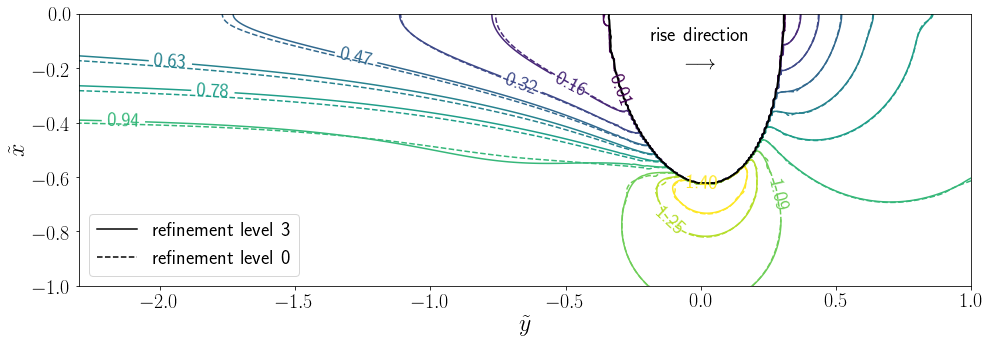

In [43]:
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(hm.figure_width, 5.0))

xi_left = np.linspace(-1.1, 0.0, nx)
yi = np.linspace(-2.3, 1.0, ny)
Xi_left, Yi_left = np.meshgrid(xi_left, yi)

U_b = 2.76750992
levels = np.linspace(0.01, 1.4, 10)

vol_f = basilisk.interpolate_volume_fraction(Xi_left, Yi_left)
vol_f_mask = np.where(vol_f < 0.5, -1.0, 1.0)

mag_U_ref0 = ref_0.interpolate_velocity(Xi_left, Yi_left, True, True)
mag_U_ref0 *= vol_f_mask
mag_U_ref3 = ref_3.interpolate_velocity(Xi_left, Yi_left, True, True)
mag_U_ref3 *= vol_f_mask


# plot x and y reversed

cont_ref0 = ax.contour(yi, xi_left, mag_U_ref0.T/U_b, levels=levels)
cont_ref3 = ax.contour(yi, xi_left, mag_U_ref3.T/U_b, levels=levels)
ax.clabel(cont_ref3, inline=True, fontsize=hm.fontsize_legend, fmt='%1.2f')
ax.contour(yi, xi_left, vol_f.T, levels=[0.5], colors=['k'], linewidths=2.0)
ax.text(0.0, -0.1, "rise direction", ha="center", fontsize=hm.fontsize_legend)
ax.text(0.0, -0.2, r"$\longrightarrow$", ha="center", fontsize=hm.fontsize_legend)


# dummy plots for legend
ax.plot([], [], ls="-", c="k", label="refinement level 3")
ax.plot([], [], ls="--", c="k", label="refinement level 0")

for line in cont_ref0.collections:
    line.set_linestyle('dashed')

ax.axis('equal')
ax.label_outer()
ax.set_xlim(-2.3, 1.0)
ax.set_ylim(-1.0, 0.0)
ax.set_xlabel(r"$\tilde{y}$", fontsize=hm.fontsize_label)
ax.set_ylabel(r"$\tilde{x}$", fontsize=hm.fontsize_label)
ax.legend(loc='lower left', fontsize=hm.fontsize_legend)
ax.tick_params(labelsize=hm.fontsize_tick)

savefig("water_05_l16_of_flow_mesh_dependency")